In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = train.drop('label', axis=1).values
y = train['label'].values

In [9]:
# Reshape the data to fit the model (28x28 pixels, 1 channel)
X = X.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)


In [10]:
# Normalize the data
X = X / 255.0
test = test / 255.0

In [11]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

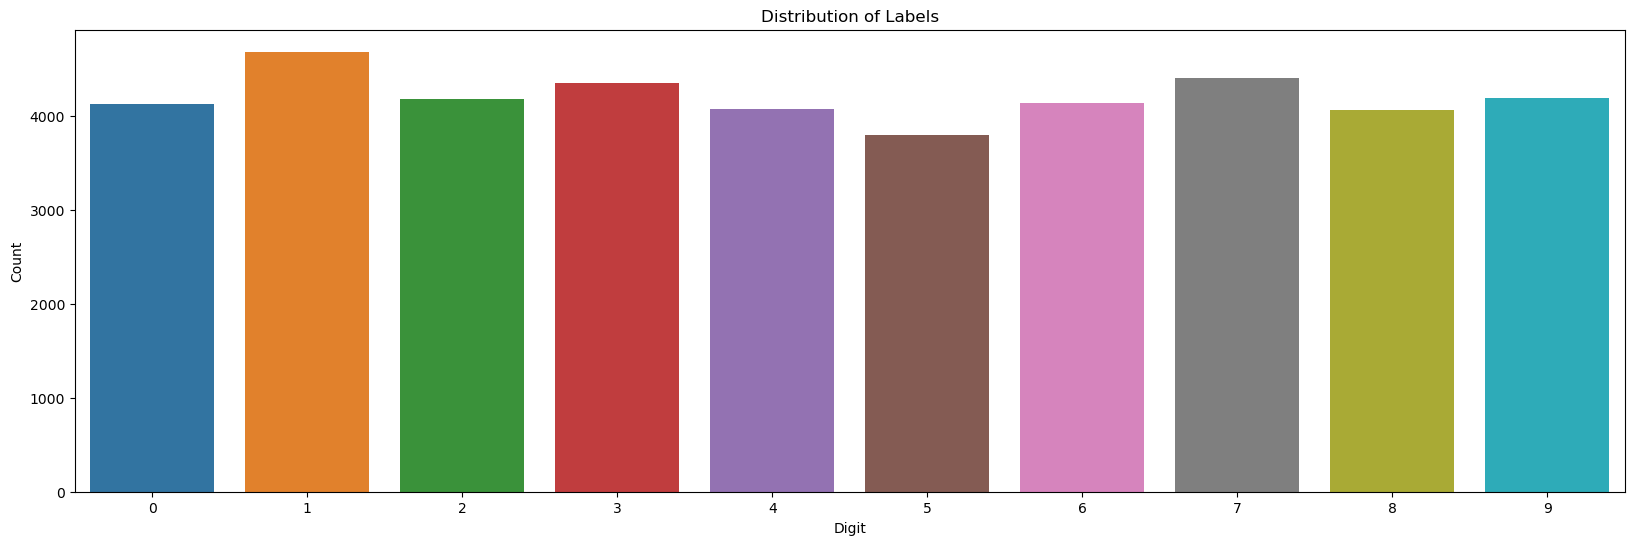

In [13]:
# Visualize the distribution of the labels
plt.figure(figsize=(20, 6))
# count plot on single categorical variable
sns.countplot(x ='label', data = train)
plt.title('Distribution of Labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

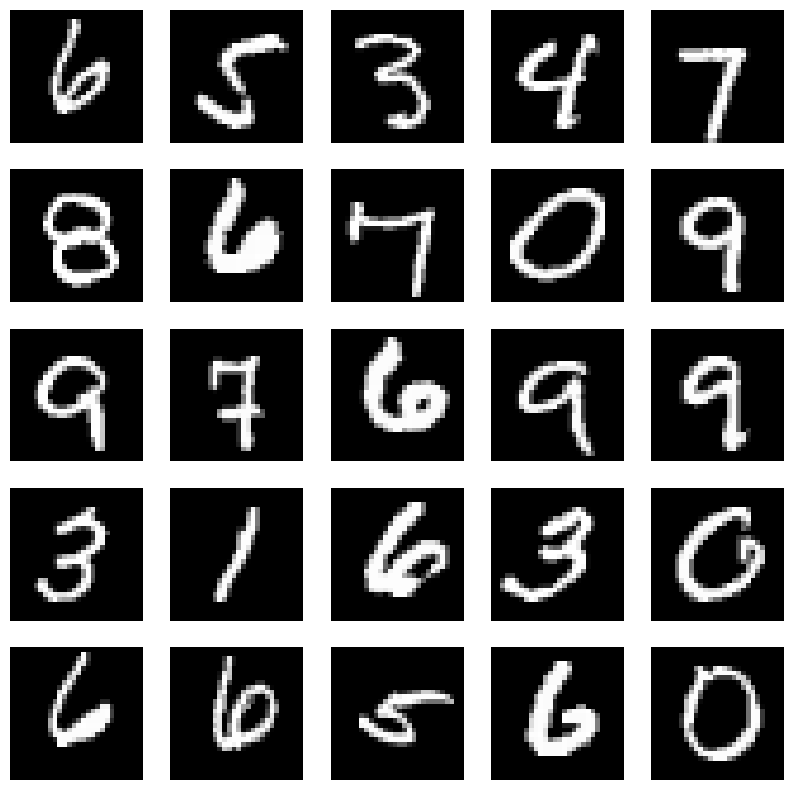

In [14]:
# Visualize some sample images
sample_images = X_train[:25].reshape(-1, 28, 28)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute', n_neighbors=5, p=2, weights='distance')
# 'brute' for searching through all the samples
# p=2 for Euclidean; p=1 for Mannhatten Distance
# Check the help file for all the arguments



In [17]:
# Reshape the data to flatten each image into a 1D array of 784 pixels
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_val.reshape(X_val.shape[0], -1)

# Initialize the kNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

# Print classification report (precision, recall, f1-score)
print(classification_report(y_val, y_pred))

Accuracy on test set: 0.9615
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       816
           1       0.95      1.00      0.97       909
           2       0.99      0.93      0.96       846
           3       0.97      0.95      0.96       937
           4       0.99      0.96      0.97       839
           5       0.96      0.95      0.95       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

   micro avg       0.97      0.96      0.97      8400
   macro avg       0.97      0.96      0.97      8400
weighted avg       0.97      0.96      0.97      8400
 samples avg       0.96      0.96      0.96      8400



C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(y_train)

ValueError: y should be a 1d array, got an array of shape (33600, 10) instead.